In [1]:
from tensorflow.keras.datasets import imdb

(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 5s 0us/step


In [2]:
print(xtrain[0])
print(ytrain[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
class_names = ['Negative', 'Positive']
word_index = imdb.get_word_index()
print(word_index['hello'])

1646592/1641221 [==============================] - 1s 1us/step
4822


In [4]:
reverse_word_index = dict((value,key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text+=reverse_word_index[i]
        text+=' '
    return text
        

In [5]:
decode(xtrain[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [7]:
def show_lengths():
    print('Length of 1st training example: ', len(xtrain[0]))
    print('Length of 2nd training example: ',  len(xtrain[1]))
    print('Length of 1st test example: ', len(xtest[0]))
    print('Length of 2nd test example: ',  len(xtest[1]))
    
show_lengths()    

Length of 1st training example:  218
Length of 2nd training example:  189
Length of 1st test example:  68
Length of 2nd test example:  260


In [8]:
word_index['the']

1

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

xtrain = pad_sequences(xtrain, value = word_index['the'], padding = 'post', maxlen = 256)
xtest = pad_sequences(xtest, value = word_index['the'], padding = 'post', maxlen = 256)

In [13]:
show_lengths()

Length of 1st training example:  256
Length of 2nd training example:  256
Length of 1st test example:  256
Length of 2nd test example:  256


In [14]:
decode(xtrain[0])

"their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of script their with her nobody most that with w

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

model = Sequential([
    
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

model.compile(
optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import LambdaCallback

simple_logging = LambdaCallback(on_epoch_end = lambda e, l : print(e, end = '.'))

E = 5

h = model.fit(
xtrain, ytrain,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_logging],
    verbose = False
)

D:\Anaconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


0.1.2.3.4.

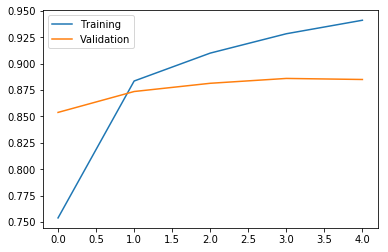

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(range(E), h.history['acc'], label = 'Training')
plt.plot(range(E), h.history['val_acc'], label = 'Validation')
plt.legend()
plt.show()

In [20]:
loss, acc = model.evaluate(xtest, ytest)
print('Test set accuracy: ', acc * 100)

25000/25000 [==============================] - 1s 25us/step
Test set accuracy:  88.028


In [24]:
import numpy as np

prediction = model.predict(np.expand_dims(xtest[0], axis = 0))
print(class_names[int(np.squeeze(prediction[0]) > 0.5)])

Negative


In [25]:
print(decode(xtest[0]))

the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring of ever it sadly sadly sadly i i was then does don't close faint after one carry as by are be favourites all family turn in does as three part in another some to be probably with world and her an have faint beginning own as is sequence the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 